# Direct method for the solution of linear systems
1. Given a matrix $A \in \mathbb{R}^{n \times n}$, the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$, and a value for $n$, write a script that:
    - Computes the right-hand side of the linear system $y = A x_{true}$ (test problem).
    - Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
    - Solves the linear system $Ax = y$ with the function `np.linalg.solve()`.
    - Computes the relative error between the computed solution and the true solution $x_{true}$.
    - Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a different window) the condition number in 2-norm and in $\infty$-norm, as a function of $n$.

2. Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:
    - A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
    - The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
    - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

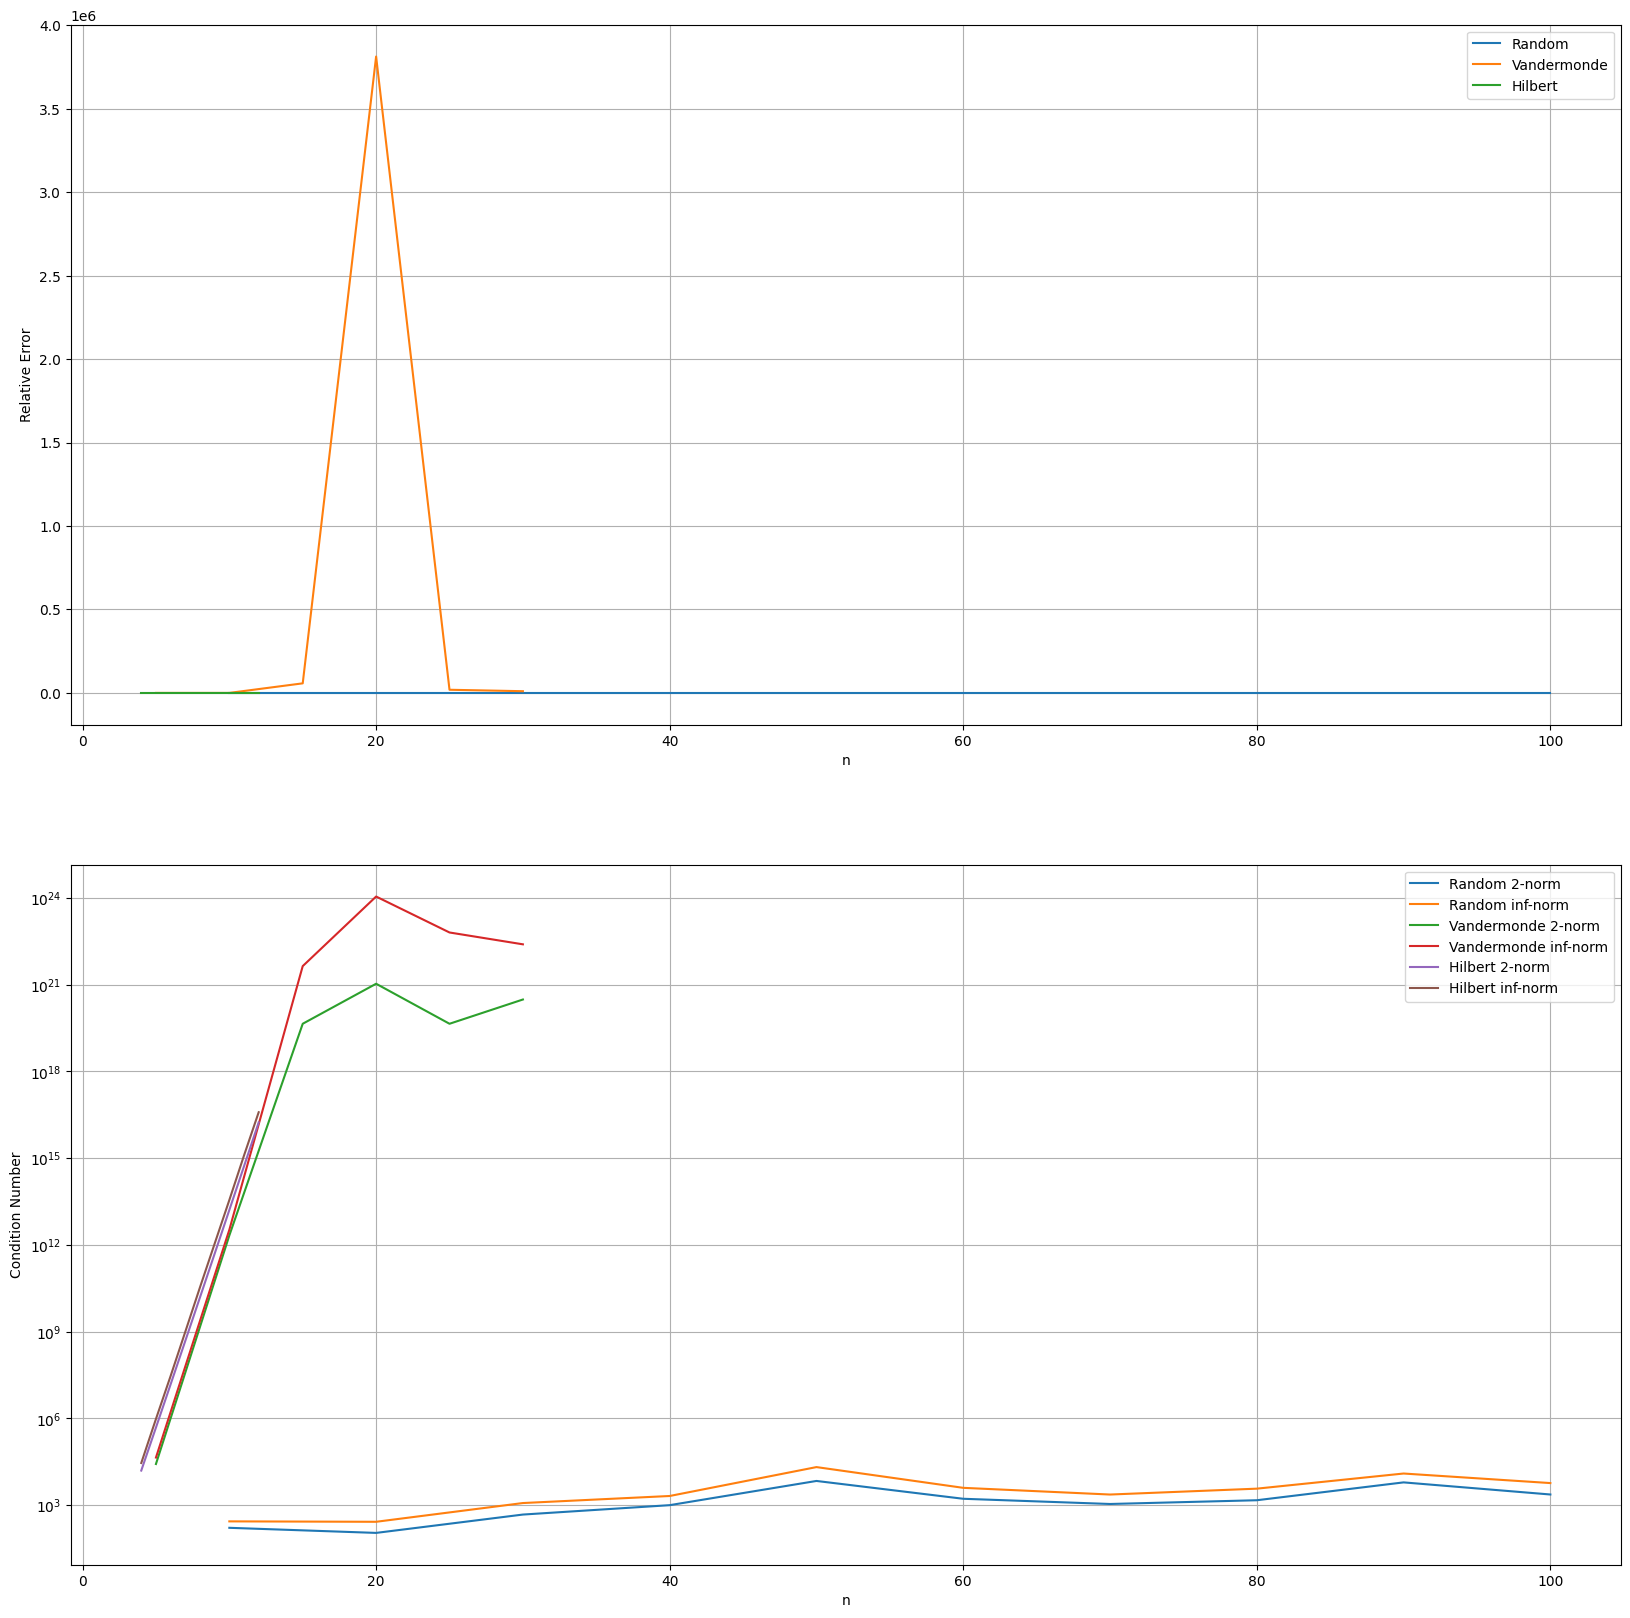

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Compute the error between the computed solution and the true solution
def compute_relative_error(x_computed, x_true):
    return np.linalg.norm(x_computed - x_true) / np.linalg.norm(x_true)

def main():
    # range of the three of matrices
    n_values_random = range(10, 101, 10)
    n_values_vander = range(5, 31, 5)
    n_values_hilbert = range(4, 13)
    
    # empty lists to store the relative errors and condition numbers
    relative_errors_random = []
    relative_errors_vander = []
    relative_errors_hilbert = []
    
    condition_numbers_2_random = []
    condition_numbers_inf_random = []
    condition_numbers_2_vander = []
    condition_numbers_inf_vander = []
    condition_numbers_2_hilbert = []
    condition_numbers_inf_hilbert = []
    #Loop through the range of n values and compute the true solution, test solution, relative error and condition number
    for n in n_values_random:
        A = np.random.rand(n, n)
        x_true = np.ones(n)
        y = A @ x_true
        
        cond_2_A = np.linalg.cond(A, 2)
        cond_inf_A = np.linalg.cond(A, np.inf)
        
        x_computed = np.linalg.solve(A, y)
        rel_error = compute_relative_error(x_computed, x_true)
        
        relative_errors_random.append(rel_error)
        condition_numbers_2_random.append(cond_2_A)
        condition_numbers_inf_random.append(cond_inf_A)
    #Loop through the range of n vander and compute the true solution, test solution, relative error and condition number
    for n in n_values_vander:
        v = np.arange(1, n+1)
        A = np.vander(v, increasing=True)
        x_true = np.ones(n)
        y = A @ x_true
        
        cond_2_A = np.linalg.cond(A, 2)
        cond_inf_A = np.linalg.cond(A, np.inf)
        
        x_computed = np.linalg.solve(A, y)
        rel_error = compute_relative_error(x_computed, x_true)
        
        relative_errors_vander.append(rel_error)
        condition_numbers_2_vander.append(cond_2_A)
        condition_numbers_inf_vander.append(cond_inf_A)
    #Loop through the range of n hilbert values and compute the true solution, test solution, relative error and condition number
    for n in n_values_hilbert:
        A = hilbert(n)
        x_true = np.ones(n)
        y = A @ x_true
        
        cond_2_A = np.linalg.cond(A, 2)
        cond_inf_A = np.linalg.cond(A, np.inf)
        
        x_computed = np.linalg.solve(A, y)
        rel_error = compute_relative_error(x_computed, x_true)
        
        relative_errors_hilbert.append(rel_error)
        condition_numbers_2_hilbert.append(cond_2_A)
        condition_numbers_inf_hilbert.append(cond_inf_A)

    #Plot the relative errors
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    plt.plot(n_values_random, relative_errors_random, label='Random')
    plt.plot(n_values_vander, relative_errors_vander, label='Vandermonde')
    plt.plot(n_values_hilbert, relative_errors_hilbert, label='Hilbert')
    plt.xlabel('n')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.grid()
    #Plot the condition numbers
    plt.subplot(2, 1, 2)
    plt.semilogy(n_values_random, condition_numbers_2_random, label='Random 2-norm')
    plt.semilogy(n_values_random, condition_numbers_inf_random, label='Random inf-norm')
    plt.semilogy(n_values_vander, condition_numbers_2_vander, label='Vandermonde 2-norm')
    plt.semilogy(n_values_vander, condition_numbers_inf_vander, label='Vandermonde inf-norm')
    plt.semilogy(n_values_hilbert, condition_numbers_2_hilbert, label='Hilbert 2-norm')
    plt.semilogy(n_values_hilbert, condition_numbers_inf_hilbert, label='Hilbert inf-norm')
    plt.xlabel('n')
    plt.ylabel('Condition Number')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()

# Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. *Tips:* use a `while` structure.

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n \to \infty} a_n = e$, where $e$ is the Nepero number. Choose diﬀerent values for $n$, compute $a_n$ and compare it to the real value of the Nepero number. What happens if you choose a large value of $n$?

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples. *Tips:* Please, have a look at `np.linalg`.

In [4]:

# Compute Machine epsilon
def compute_machine_epsilon():
    epsilon = 1.0
    while (1.0 + epsilon) != 1.0:
        epsilon /= 2.0
    return epsilon * 2.0

machine_epsilon = compute_machine_epsilon()
print(f"Machine epsilon: {machine_epsilon}")

# Compute the sequence a_n = (1 + 1/n)^n and compare to e
def compute_a_n(n):
    return (1 + 1/n)**n

n_values = [10, 100, 1000, 10000, 100000]
a_n_values = [compute_a_n(n) for n in n_values]
e = np.exp(1)

print("n\t\t a_n\t\t\t e\t\t\t Difference")
for n, a_n in zip(n_values, a_n_values):
    print(f"{n}\t {a_n:.15f}\t {e:.15f}\t {abs(a_n - e):.15f}")

# rank and eigenvalues of matrices A and B
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)

print(f"Rank of A: {rank_A}")
print(f"Eigenvalues of A: {eigenvalues_A}")

print(f"Rank of B: {rank_B}")
print(f"Eigenvalues of B: {eigenvalues_B}")

# Check if A and B are full-rank matrices
is_A_full_rank = rank_A == min(A.shape)
is_B_full_rank = rank_B == min(B.shape)

print(f"Is A full-rank? {'Yes' if is_A_full_rank else 'No'}")
print(f"Is B full-rank? {'Yes' if is_B_full_rank else 'No'}")



Machine epsilon: 2.220446049250313e-16
n		 a_n			 e			 Difference
10	 2.593742460100002	 2.718281828459045	 0.124539368359043
100	 2.704813829421528	 2.718281828459045	 0.013467999037517
1000	 2.716923932235594	 2.718281828459045	 0.001357896223452
10000	 2.718145926824926	 2.718281828459045	 0.000135901634120
100000	 2.718268237192297	 2.718281828459045	 0.000013591266748
Rank of A: 2
Eigenvalues of A: [5. 2.]
Rank of B: 1
Eigenvalues of B: [5. 0.]
Is A full-rank? Yes
Is B full-rank? No
